In [237]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio

from hmmlearn import hmm
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

np.random.seed(42)

In [238]:
# load dataset
dataset = sio.loadmat('/Users/yang/Desktop/IL2232/MyCode/PythonVersionHMM/dataset/lympho.mat')

# first 6 data are outliers => extract them
n_anomaly = 6
lengthX = len(dataset['X'])
lengthY = len(dataset['y'])
outlierX = dataset['X'][:n_anomaly]
outlierY = dataset['y'][:n_anomaly] # all ones
nomialX = dataset['X'][n_anomaly:lengthX]
nomialY = dataset['y'][n_anomaly:lengthY]

# train test split
X_train, X_test, y_train, y_test = train_test_split(
    nomialX, nomialY, test_size = 0.3)
X_test = np.concatenate((outlierX, X_test), axis = 0)
y_test = np.concatenate((outlierY, y_test), axis = 0)

# concatenate the data into sequences used for fit and predict
X_train_arr = X_train[0]
X_test_arr = X_test[0]
X_train_len = [len(X_train[0])]
X_test_len = [len(X_test[0])]
for i in range(X_train.shape[0] - 1):
    X_train_arr = np.concatenate([X_train_arr, X_train[i + 1]])
    X_train_len = np.concatenate([X_train_len, [len(X_train[i + 1])]])

for i in range(X_test.shape[0] - 1):
    X_test_arr = np.concatenate([X_test_arr, X_test[i + 1]])
    X_test_len = np.concatenate([X_test_len, [len(X_test[i + 1])]])


In [239]:
# initialize the model
n_components = 30
n_features = 8
model = hmm.MultinomialHMM(n_components = n_components)

# initialize number of features V
model.n_features = n_features

# initialize the starte probability matrix pi
# always start from state 0
# model.startprob_ = np.concatenate(
#   [[1.], np.zeros(n_components - 1)])
# model.startprob_ = np.random.dirichlet(np.ones(n_components))

# initialize the transission probability matrix
# for i in range(n_components):
#    transmat[i] = np.random.dirichlet(np.ones(n_components))
#    emissionprob[i] = np.random.dirichlet(n_features)
    
# model.transmat_ = transmat
# model.emissionprob_ = emissionprob

In [240]:
# label
le = preprocessing.LabelEncoder()
le.fit([1., 2., 3., 4., 5., 6., 7., 8.])

LabelEncoder()

In [241]:
data = X_train_arr
data = le.transform(data)
model.fit(data.reshape(-1, 1), X_train_len)

MultinomialHMM(n_components=30,
               random_state=RandomState(MT19937) at 0x7FBE585B5340)

In [242]:
data = X_test_arr
data = le.transform(data)
model.score(data.reshape(-1, 1), X_test_len)

-1082.1604890826663

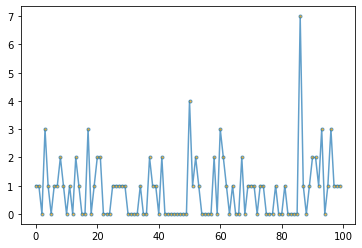

[23 27 29 23 21  1  2 12  9  0 28 13  1 20  0 26 25 16  0 22  8 24 13 13
 27 26  4  7 27  7 16 28  6 18 29 18 29  7  4 16 29  5  6 16 29 28  5 29
  2 21 25  9 24 19  6 27  3  8  9 22 19 15  1 27  6 21  5 17 28 16  2 23
 12 11  9 19 16 17 11  3 28  6 28 28 29 28  0  3 12  5 10 24  5 21  6 11
  9  3 27 11]


In [243]:
# Generate samples
X, Z = model.sample(n_samples = 100, random_state = 13)

# Plot the sampled data
plt.plot(X[:, 0], ".-", label="observations", ms=6,
         mfc="orange", alpha=0.7)

plt.show()

print(Z)